/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


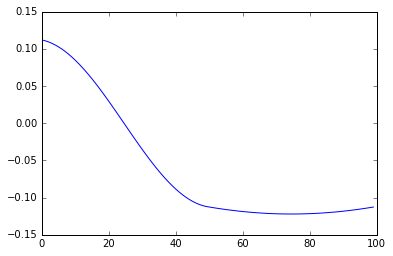

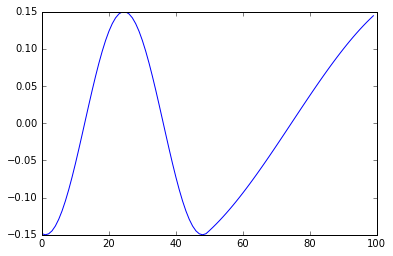

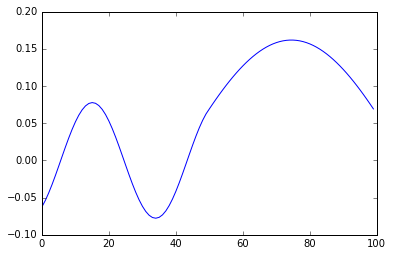

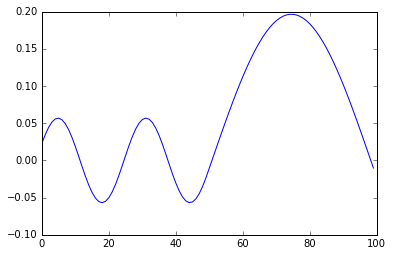

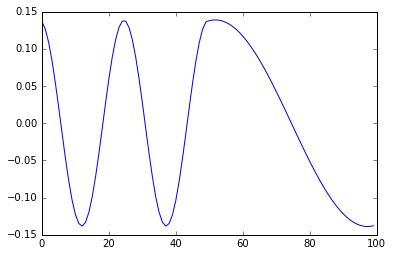

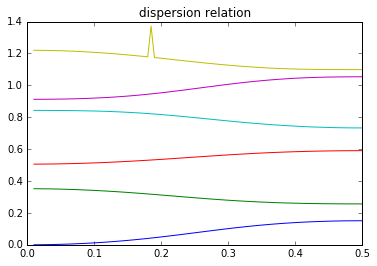

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation

import numpy as np
import scipy.sparse.linalg as ssl

c = 1 #spd of light
size = 1   # domain size
n = 100    # number of steps
dx = size/n  #step size
getev = 6 # eigenvalues desired

eps1 = 13
eps2 = 1

iden = np.ones((n,n)) #identity matrix
F = (1/dx)*(np.triu(iden)-2*np.diag(np.diag(iden))-np.triu(iden,2))
B = (1/dx)*(-np.tril(iden)+2*np.diag(np.diag(iden))+np.tril(iden,-2))

epscol = (1/eps1)*np.ones(n/2)
epscol = np.append(epscol, (1/eps2)*np.ones(n/2))
epsma = np.diag(epscol)

kvec = 2*np.pi*np.arange(0.01,0.501,0.005)  #range of k's to be used
k = np.zeros((getev, len(kvec)), dtype=complex)  #eigenvalues go here

for i in range(0,len(kvec)):
    k0 = kvec[i]
    
    F[n-1,0] = np.cos(k0*size)/dx
    B[0,n-1] = -np.cos(k0*size)/dx
    bf = -np.matmul(B,F)
    ebf = np.matmul(epsma,bf)
    
    kt = k0/np.sqrt((eps1+eps2)/2)
    k2, V = ssl.eigs(ebf, k=6, M=None, sigma=kt**2)
    
    k[:,i] = np.sqrt(k2)/c

#print(np.linalg.eigvals(bf-kt**2))
#print(np.real(k))

lam = 2*np.pi*c/np.real(k)
#qualf = np.real(k)/(2*np.imag(k))


plt.hold(True)
fignum = 0
for i in range(1, getev):
    fignum = fignum + 1
    plt.figure(fignum)
    plt.plot(V[:,i])
        
plt.figure(fignum+1)
plt.title("dispersion relation")
for i in range(0, getev):
    plt.plot((kvec/(2*np.pi)), ((k[i,:])/(2*np.pi)))